#### Linear regression



We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.


In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [4]:
df = pd.read_csv('insurance.csv', error_bad_lines=False)

In [6]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
df.shape

(1338, 7)



Now we have import dataset. When we look at the shape of dataset it has return as (1338,7).So there are m=1338
training exaple and n=7 independent variable. The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable. There are multiple independent variable, so we need to fit Multiple linear regression. Then the hypothesis function looks like

hθ(xi)=θ0+θ1age+θ2sex+θ3bmi+θ4children+θ5smoker+θ6region

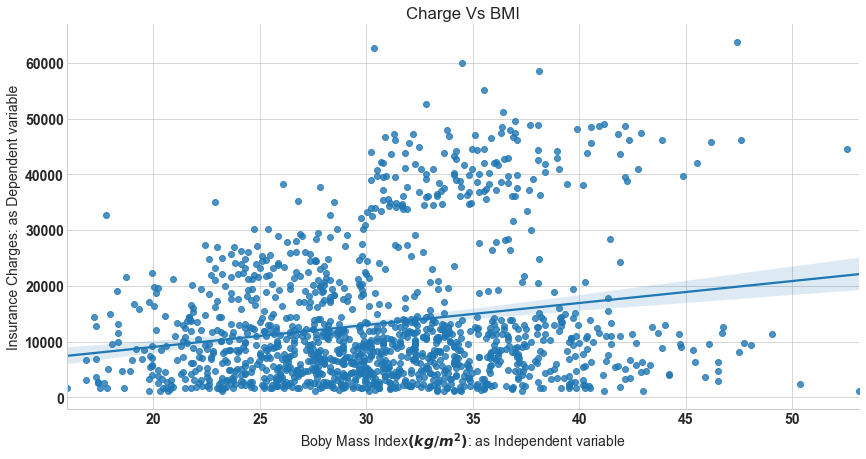

In [10]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

In above plot we fit regression line into the variables.

#### Cost function

A cost function measures how much error in the model is in terms of ability to estimate the relationship between x
and y. We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.

#### Exploratory data analysis

In [11]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

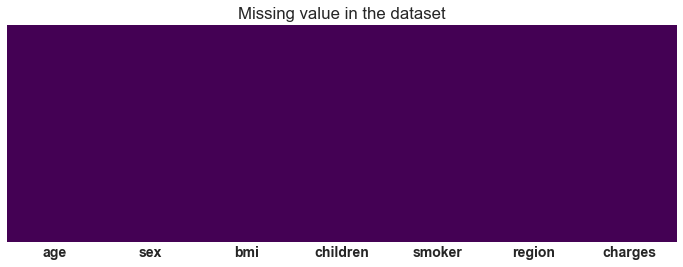

In [12]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');



There is no missing value in the data sex


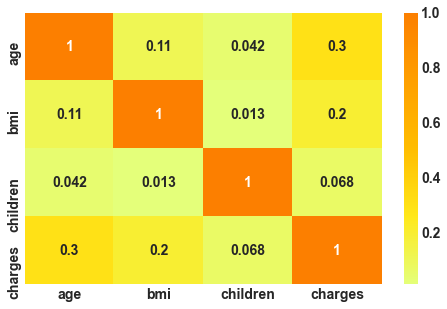

In [17]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

Thier no correlation among valiables.

C:\Users\356285\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\356285\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


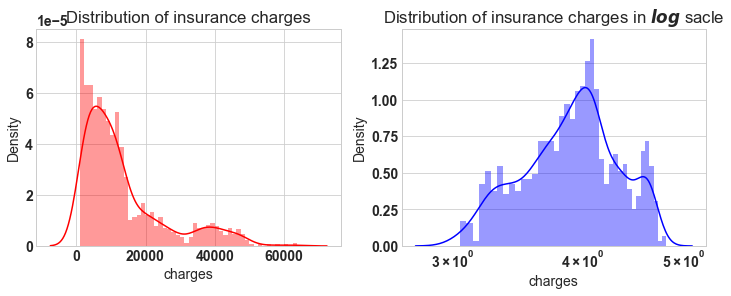

In [18]:

f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');



If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. for further analysis we will apply log on target variable charges.


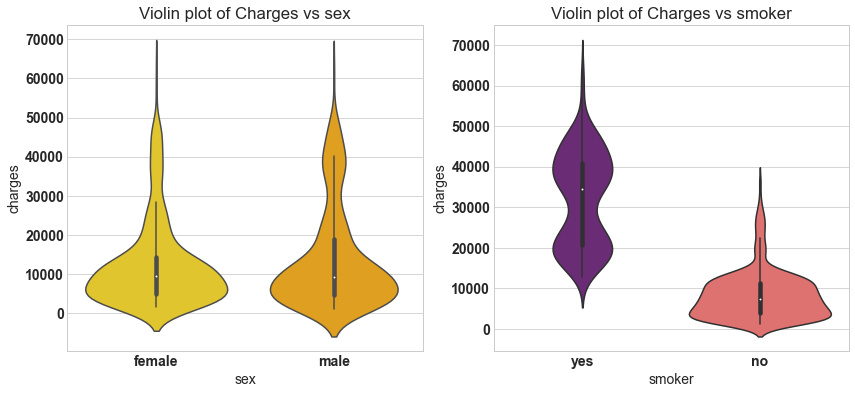

In [19]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');



From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.


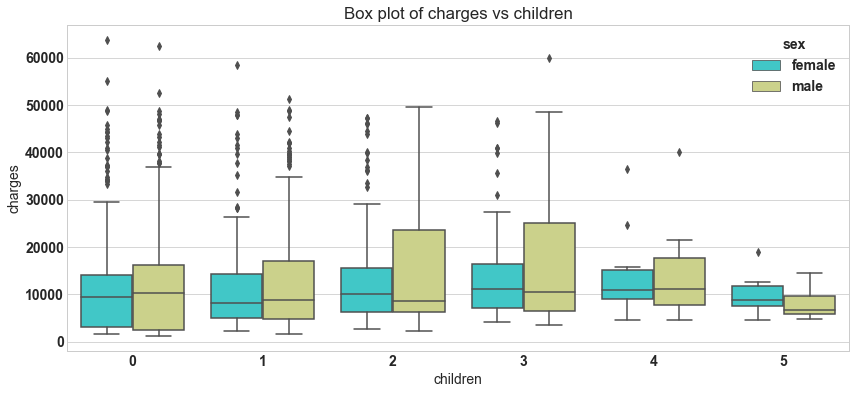

In [20]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [21]:
df.groupby('children').agg(['mean','min','max'])['charges']

mean        min          max
children                                      
0         12365.975602  1121.8739  63770.42801
1         12731.171832  1711.0268  58571.07448
2         15073.563734  2304.0022  49577.66240
3         15355.318367  3443.0640  60021.39897
4         13850.656311  4504.6624  40182.24600
5          8786.035247  4687.7970  19023.26000

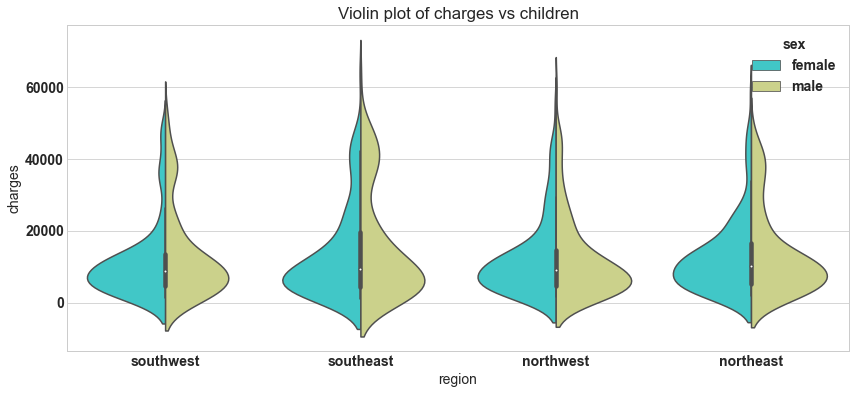

In [22]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

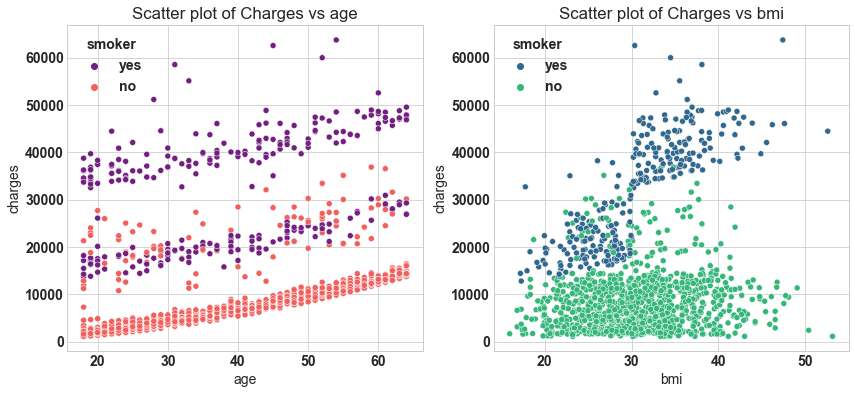

In [23]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take 1st and 2nd slab, for smoker policy start at 2nd and 3rd

slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16kg/m2
and maximum upto 54kg/m2


### Data Preprocessing
Encoding

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

    Label Encoding
    One hot encoding
    Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated in simple term one variable can be predicted from the others.

##### By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by droping one variable and original variable.The pandas makes our life easy.


In [24]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [28]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)



### Box -Cox transformation

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.

In [29]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc  
# it did not perform better for this model, so log transform is used
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [30]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])



The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable is droped from the column. So we completed all three encoding step by using get dummies function.



#### Train Test split

In [31]:
from sklearn.model_selection import train_test_split
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)


### Model building

In this step build model using our linear regression equation θ=(XTX)−1XTy
. In first step we need to add a feature x0=1 to our original data set.

In [32]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [33]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [34]:


# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df



Parameter          Columns     theta  Sklearn_theta
0    theta_0  intersect:x_0=1  7.059171       7.059171
1    theta_1              age  0.033134       0.033134
2    theta_2              bmi  0.013517       0.013517
3    theta_3         OHE_male -0.067767      -0.067767
4    theta_4            OHE_1  0.149457       0.149457
5    theta_5            OHE_2  0.272919       0.272919
6    theta_6            OHE_3  0.244095       0.244095
7    theta_7            OHE_4  0.523339       0.523339
8    theta_8            OHE_5  0.466030       0.466030
9    theta_9          OHE_yes  1.550481       1.550481
10  theta_10    OHE_northwest -0.055845      -0.055845
11  theta_11    OHE_southeast -0.146578      -0.146578
12  theta_12    OHE_southwest -0.133508      -0.133508



The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

### Model evaluation
<br>

We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute Mean Square Error using formula
<br>
J(θ)=1m∑i=1m(y^i−yi)2
<br>

R2
is statistical measure of how close data are to the fitted regression line. R2
<br>
is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.
<br>
R2=1−SSESST
<br>
SSE = Sum of Square Error
<br>
SST = Sum of Square Total
<br>
SSE=∑i=1m(y^i−yi)2
<br>
SST=∑i=1m(yi−y¯i)2
<br>
Here y^ is predicted value and y¯ is mean value of y.

In [35]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.1872962232298186
R square obtain for normal equation method is : 0.7795687545055323


In [37]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981895
R square obtain for scikit learn library is : 0.7795687545055319


The model returns R2
<br>

value of 77.95%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying natural log. When we put model into production antilog is applied to the equation.
### Model Validation
<br>
In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear Regression model are following
<br>
   1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value
<br>   
2.The residual error plot should be normally distributed.
    <br>
    3.The mean of residual error should be 0 or close to 0 as much as possible
<br>   
4.The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
   <br>
   5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation. VIF=11−R2

, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
<br>
6.Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

C:\Users\356285\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\356285\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


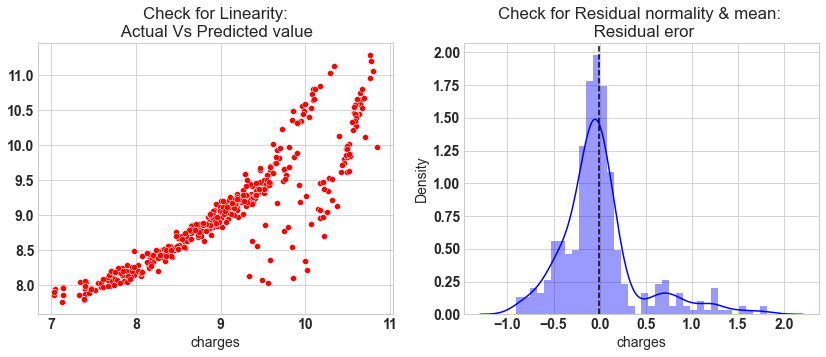

In [38]:


# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');



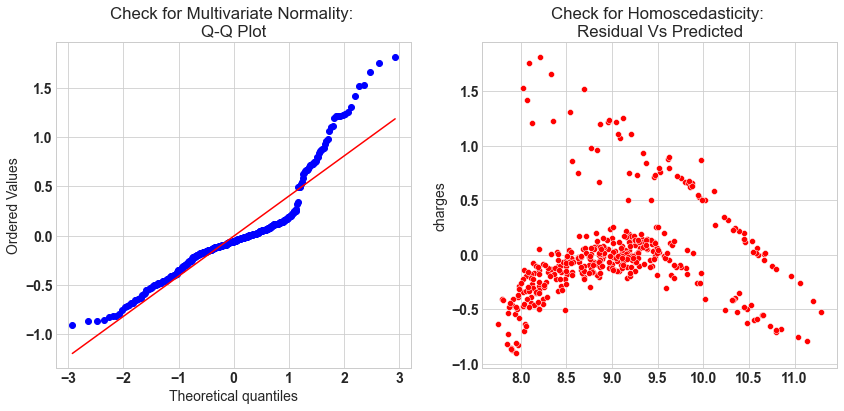

In [39]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [40]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138



The model assumption linear regression as follows
<br>
    1.In our model the actual vs predicted plot is curve so linear assumption fails
    <br>
    2.The residual mean is zero and residual error plot right skewed
    <br>
    3.Q-Q plot shows as value log value greater than 1.5 trends to increase
    <br>
    4.The plot is exhibit heteroscedastic, error will insease after certian point.
    <br>
    5.Variance inflation factor value is less than 5, so no multicollearity.

